In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('train_cleaned.csv')
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [3]:
#Segregating variables into dependent and independent variables
x = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [4]:
#splitting the data into train and test 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56)

In [5]:
#implementing linear regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [6]:
lr = LR()

lr.fit(train_x, train_y)

LinearRegression()

In [7]:
#predicting over train set and test set
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Root Mean squared Error over train set is', np.sqrt(k))

Root Mean squared Error over train set is 1103.7961287014982


In [8]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Test Root Mean Absolute Error    ', np.sqrt(k) )

Test Root Mean Absolute Error     1196.642154537052


Parameters of linear Regression

In [9]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

Text(0, 0.5, 'Coefficients')

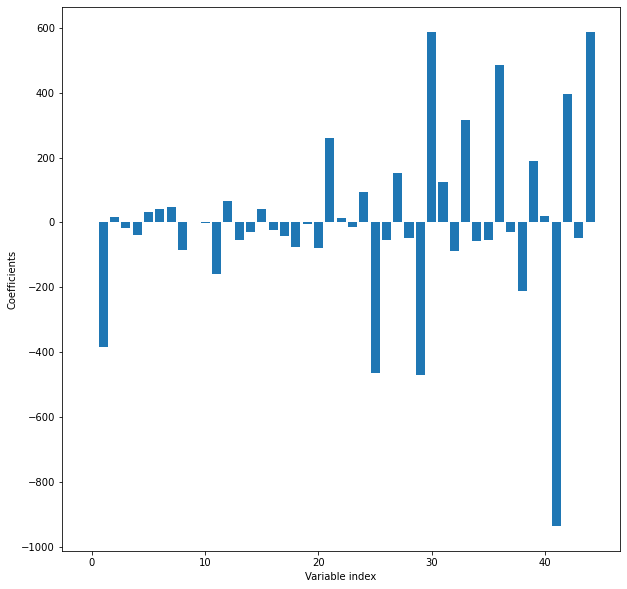

In [10]:
#plotting coefficients
import seaborn as sns
plt.figure(figsize=(10, 10))
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel('Variable index')
plt.ylabel('Coefficients')

Since the data is not normalized ie some variables have a scale of 1e5  while some 100, We will have to normalize the data 

Validating the regression assumptions

<AxesSubplot:>

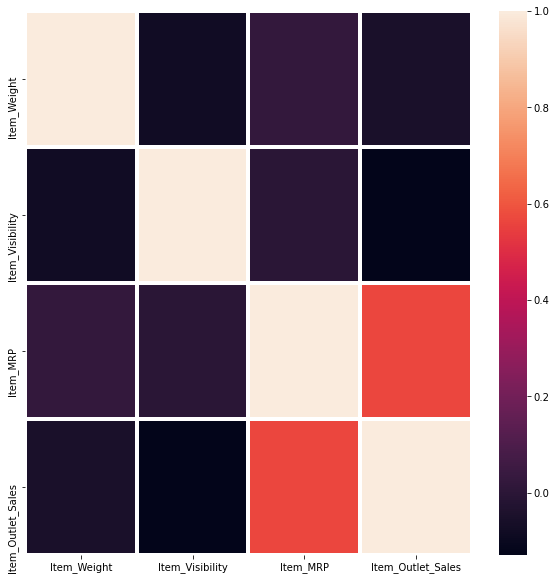

In [11]:
#calculating the pearson correlation between the numerical variables and the dependent variables y
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
numerical_data = data[numerical_cols]
plt.figure(figsize = (10, 10))
correlation = numerical_data.dropna().corr(method = 'pearson')
sns.heatmap(correlation, linewidth = 3)

We can see that item_visibility and item_weight have very low linear relationship between the variables

Arranging and Calculating residuals 

In [12]:
residuals = pd.DataFrame(
    {
    'fitted_values': test_y,
    'predicted_values': test_predict
    }
)
residuals['residuals'] = residuals['fitted_values'] - residuals['predicted_values']
residuals.head()

,fitted_values,predicted_values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


Plotting the residual Values

In [13]:
residuals.shape

(2131, 3)

Text(0.5, 1.0, 'Residual Plot')

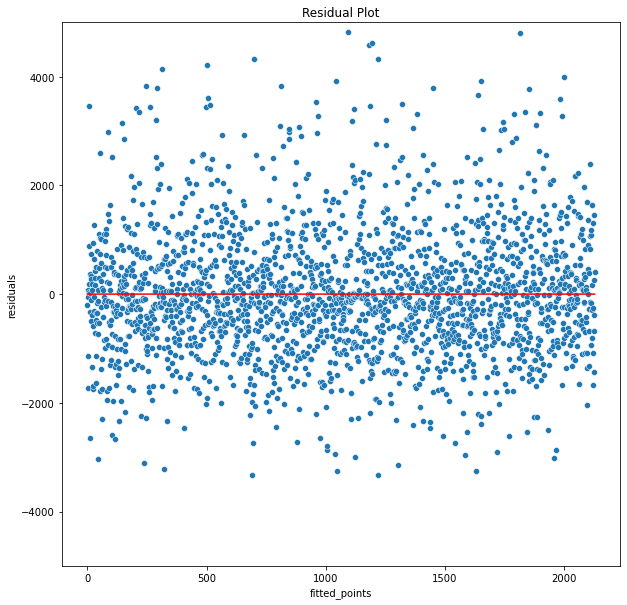

In [14]:
X = range(0, 2131)
Y = [0 for i in range(0, 2131)]
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X, y='residuals', data=residuals)
plt.plot(X, Y, label = 'regression line', color = 'red')
plt.ylim(-5000, 5000)
plt.xlabel('fitted_points')
plt.ylabel('residuals')
plt.title('Residual Plot')

We can see that the residuals do not have any trend and have constant variance

Checking for multicollinearity

Variance Inflation Factor

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [16]:
VIF  = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
VIF

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

Since there is no variable with VIF greater than 5 or even 4 there doesnt seem to be any Multi - collinearity in the dataset.

Checking Distribution of Residuals

Text(0, 0.5, 'residuals')

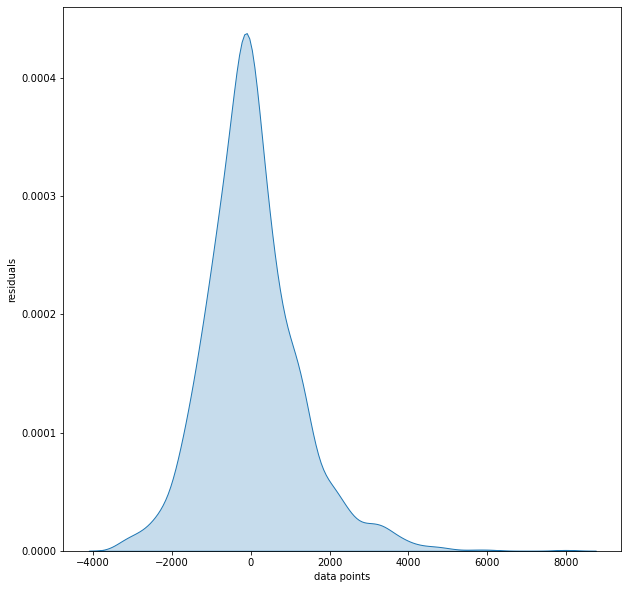

In [17]:
plt.figure(figsize=(10, 10))
sns.kdeplot(x='residuals', data=residuals, shade = True)
plt.xlabel('data points')
plt.ylabel('residuals')

The plot looks quite normal exccluding the outliers present in the residuals

In [18]:
import statsmodels.api as sm
import pylab as py

import warnings
warnings.filterwarnings('ignore') 

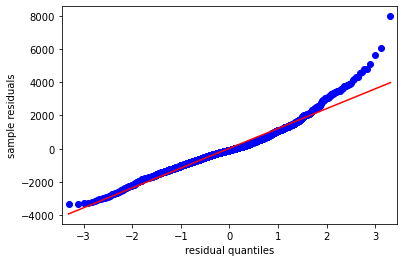

In [19]:
sm.qqplot(residuals.residuals, line = 's')
plt.ylabel('sample residuals')
plt.xlabel('residual quantiles')
py.show()

Data is mostly normal in nature but there are some outliers present in the errors

To interpret the model we need to normalize the data

In [20]:
lr = LR(normalize = True)

lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [21]:
#predicting over train_set
train_predict = lr.predict(train_x)
k = mse(train_y, train_predict)
print('root mean squared error is: ', np.sqrt(k))

root mean squared error is:  1103.7960239223037


In [22]:
#predicting over test set
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('root mean squared error is: ', np.sqrt(k))

root mean squared error is:  1196.642548558686


Text(0.5, 1.0, 'Normalize coefficients')

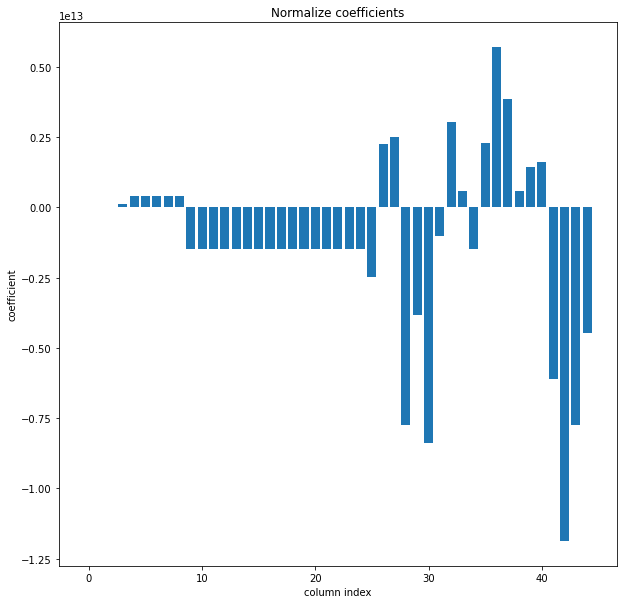

In [23]:
#plotting normalized coefficients
plt.figure(figsize=(10, 10))
X = range(len(train_x.columns))
Y = lr.coef_
plt.bar(X, Y)
plt.xlabel('column index')
plt.ylabel('coefficient')
plt.title('Normalize coefficients')

In [24]:
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [25]:
data = pd.DataFrame({
    'variables' : train_x.columns,
    'coefficients' : lr.coef_
    }
)

In [26]:
data.head()

,variables,coefficients
0,Item_Weight,1.789277e-01
1,Item_Visibility,-3.846212e+02
2,Item_MRP,1.549805e+01
3,Outlet_Establishment_Year,1.113180e+11
4,Item_Fat_Content_LF,3.817692e+11


In [27]:
## subsetting data
## removing coefficients with value less than 0.5
cols = data.loc[data.coefficients > 0.5,  'variables']
cols

2                        Item_MRP
3       Outlet_Establishment_Year
4             Item_Fat_Content_LF
5        Item_Fat_Content_Low Fat
6        Item_Fat_Content_Regular
7        Item_Fat_Content_low fat
8            Item_Fat_Content_reg
26       Outlet_Identifier_OUT013
27       Outlet_Identifier_OUT017
32       Outlet_Identifier_OUT045
33       Outlet_Identifier_OUT046
35               Outlet_Size_High
36             Outlet_Size_Medium
37              Outlet_Size_Small
38    Outlet_Location_Type_Tier 1
39    Outlet_Location_Type_Tier 2
40    Outlet_Location_Type_Tier 3
Name: variables, dtype: object

In [28]:
data = pd.read_csv('train_cleaned.csv')
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [29]:
data = data[cols]
data.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,249.8092,1999,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,48.2692,2009,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,141.6180,1999,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,182.0950,1998,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,53.8614,1987,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


In [30]:
## creating new sets of data
x = data
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 55)

In [31]:
lr = LR(normalize = True)

lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [32]:
##predicting over train_set
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('root mean square error over train set', np.sqrt(k))

root mean square error over train set 1118.3411713261094


In [33]:
##predicting over test set
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('root mean square error over test set', np.sqrt(k))

root mean square error over test set 1155.0366004134933


Text(0, 0.5, 'coefficient')

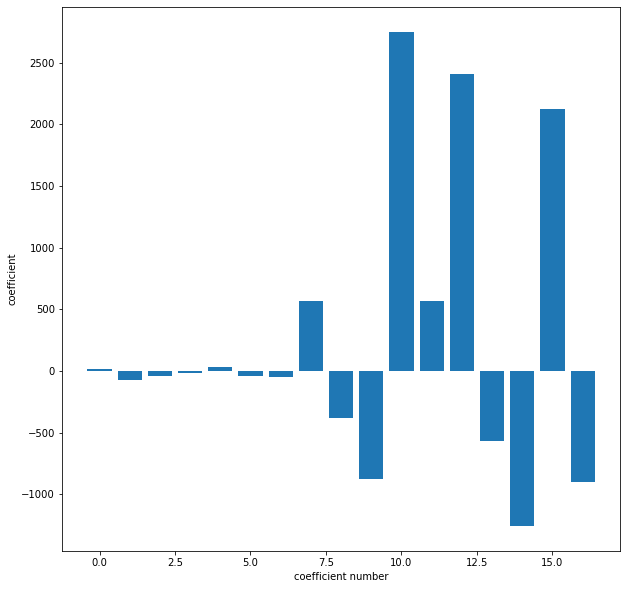

In [34]:
## visualizing coefficients
x = range(len(train_x.columns))
y = lr.coef_
plt.figure(figsize=(10, 10))
plt.bar(x, y)
plt.xlabel('coefficient number')
plt.ylabel('coefficient')